# Retail Sales Sataset
---


**1. Transaction ID**: A unique identifier for each transaction, allowing tracking and reference.

**2. Date**: The date when the transaction occurred, providing insights into sales trends over time.

**3. Customer ID**: A unique identifier for each customer, enabling customer-centric analysis.

**4. Gender**: The gender of the customer (Male/Female), offering insights into gender-based purchasing patterns.

**5. Age**: The age of the customer, facilitating segmentation and exploration of age-related influences.

**6. Product Category**: The category of the purchased product (e.g., Electronics, Clothing, Beauty), helping understand product preferences.

**7. Quantity**: The number of units of the product purchased, contributing to insights on purchase volumes.

**8. Price per Unit**: The price of one unit of the product, aiding in calculations related to total spending.

**9. Total Amount**: The total monetary value of the transaction, showcasing the financial impact of each purchase.

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

# Settings
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Step 2: Load the Dataset
# Replace the path with your actual file location
df = pd.read_csv('./dataset/retail_sales_dataset.csv')  # e.g. 'RetailSales.csv'
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [11]:
# Step 4: Data Cleaning (example assumptions)
# Convert date column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Check for duplicates
df.drop_duplicates(inplace=True)

# Optional: Create a new column for total sales if not present
if 'Total_Sales' not in df.columns:
    df['Total_Sales'] = df['Quantity'] * df['Price per Unit']  # Change column names if needed


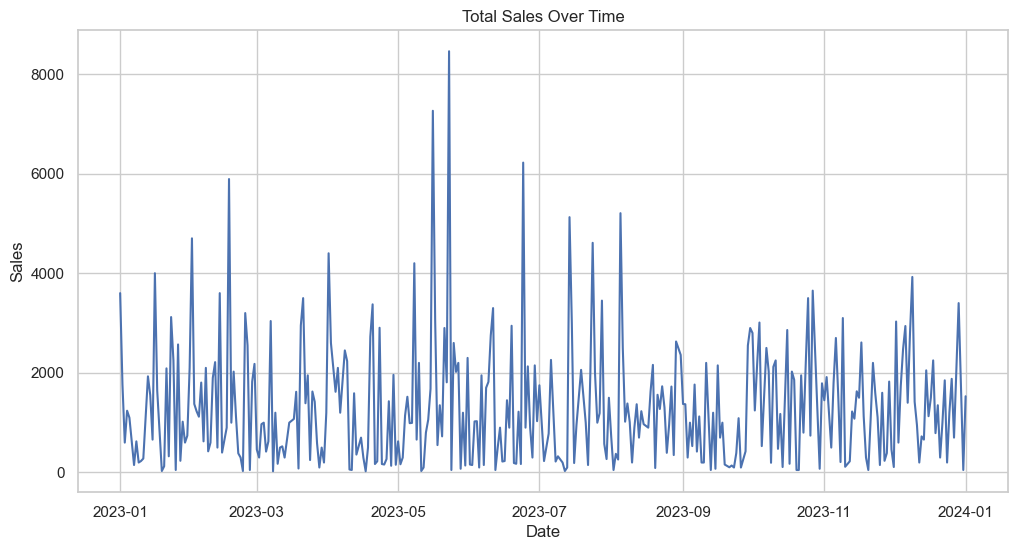

In [12]:
# 📈 Step 5: Sales Trends Over Time
# Daily sales
daily_sales = df.groupby('Date')['Total_Sales'].sum().reset_index()
sns.lineplot(data=daily_sales, x='Date', y='Total_Sales')
plt.title("Total Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.show()


['Beauty' 'Clothing' 'Electronics']


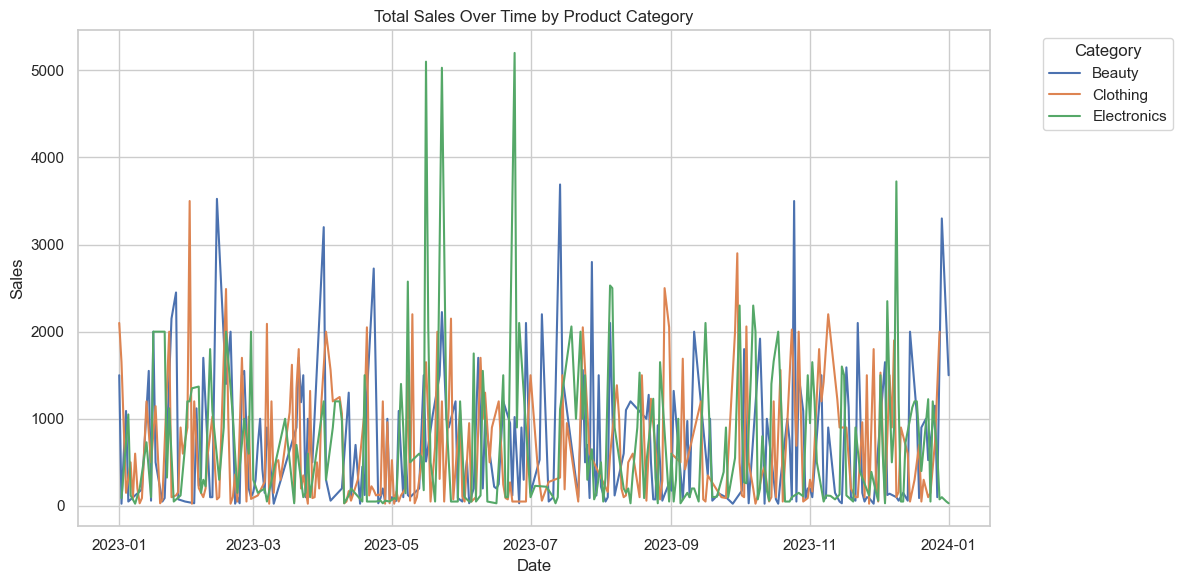

In [13]:
# Check unique values in the category column to understand what you're working with
print(df['Product Category'].unique())  # Adjust column name if needed

# Group by Date and Product Category
category_sales = df.groupby(['Date', 'Product Category'])['Total_Sales'].sum().reset_index()

# Plot using seaborn lineplot with hue to separate categories
sns.lineplot(data=category_sales, x='Date', y='Total_Sales', hue='Product Category')
plt.title("Total Sales Over Time by Product Category")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')  # Puts legend outside the plot
plt.tight_layout()
plt.show()


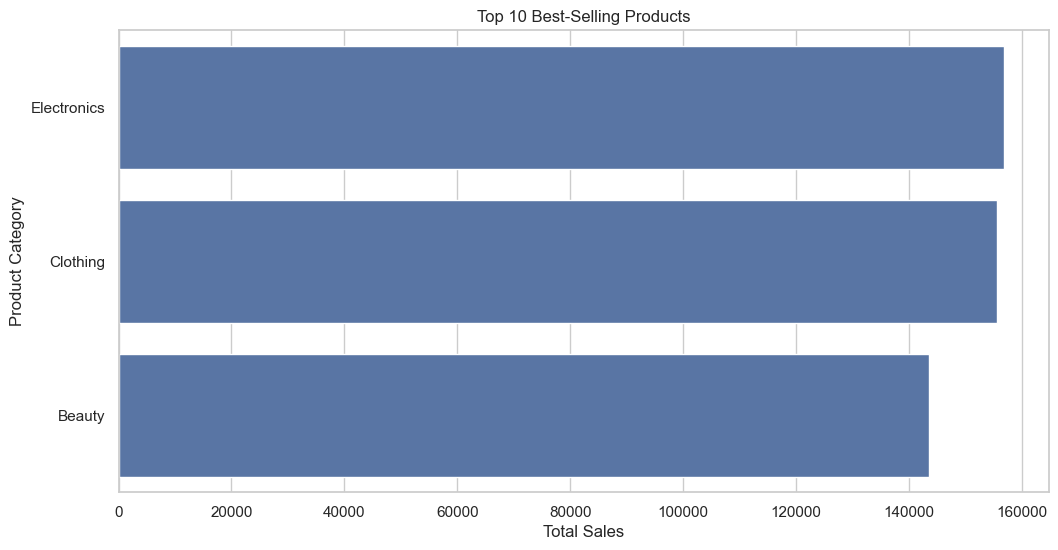

In [14]:
# Step 6: Best-Selling Products
top_products = df.groupby('Product Category')['Total_Sales'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=top_products.values, y=top_products.index)
plt.title("Top 10 Best-Selling Products")
plt.xlabel("Total Sales")
plt.ylabel("Product Category")
plt.show()

In [15]:
# from statsmodels.tsa.seasonal import seasonal_decompose

# # Ensure Date is datetime and set as index
# df['Date'] = pd.to_datetime(df['Date'])
# df = df.set_index('Date')

# # Get the unique product categories
# categories = df['Product Category'].unique()

# # Loop through each category
# for category in categories:
#     print(f"\n🗂️ Category: {category}")
    
#     # Filter the category
#     df_cat = df[df['Product Category'] == category]
    
#     # Resample monthly sales
#     monthly_sales = df_cat['Total_Sales'].resample('M').sum()
    
#     # Drop missing values (required for decomposition)
#     monthly_sales = monthly_sales.dropna()
    
#     # Must have enough data points (at least 2 full cycles of 12 months for seasonal_decompose)
#     if len(monthly_sales) >= 24:
#         # Decompose (additive model; use multiplicative if needed)
#         result = seasonal_decompose(monthly_sales, model='additive', period=12)
        
#         # Plot
#         result.plot()
#         plt.suptitle(f"Seasonal Decomposition - {category}", fontsize=16)
#         plt.tight_layout()
#         plt.show()
#     else:
#         print(f"⚠️ Not enough data points to decompose category: {category}")


In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose
print(df.columns)
# Step 1: Set Date as index and resample monthly
df_ts = df.set_index('Date')
monthly_sales = df_ts['Total_Sales'].resample('M').sum()

# Step 2: Decompose the time series
decomposition = seasonal_decompose(monthly_sales, model='additive', period=12)

# Step 3: Plot the decomposition
decomposition.plot()
plt.suptitle("📉 Seasonal Decomposition of Monthly Sales", fontsize=16)
plt.tight_layout()
plt.show()


Index(['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age',
       'Product Category', 'Quantity', 'Price per Unit', 'Total Amount',
       'Total_Sales'],
      dtype='object')


C:\Users\patti\AppData\Local\Temp\ipykernel_15236\1364392617.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df_ts['Total_Sales'].resample('M').sum()


ValueError: x must have 2 complete cycles requires 24 observations. x only has 13 observation(s)